In [49]:
%pip install pandas scikit-learn matplotlib numpy seaborn xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("./TCS.NS.csv",parse_dates=True, index_col="Date")
# df.set_index("DATE")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-30,3297.000000,3386.600098,3286.350098,3375.250000,3291.009277,2094624
2022-05-31,3354.149902,3383.399902,3325.000000,3364.350098,3280.381592,4840965
2022-06-01,3388.000000,3388.000000,3340.050049,3355.199951,3271.459717,1493835
2022-06-02,3355.000000,3432.000000,3346.300049,3423.000000,3337.567627,2657939
2022-06-03,3459.399902,3477.300049,3431.199951,3440.149902,3354.289307,1913622


<Axes: xlabel='Date'>

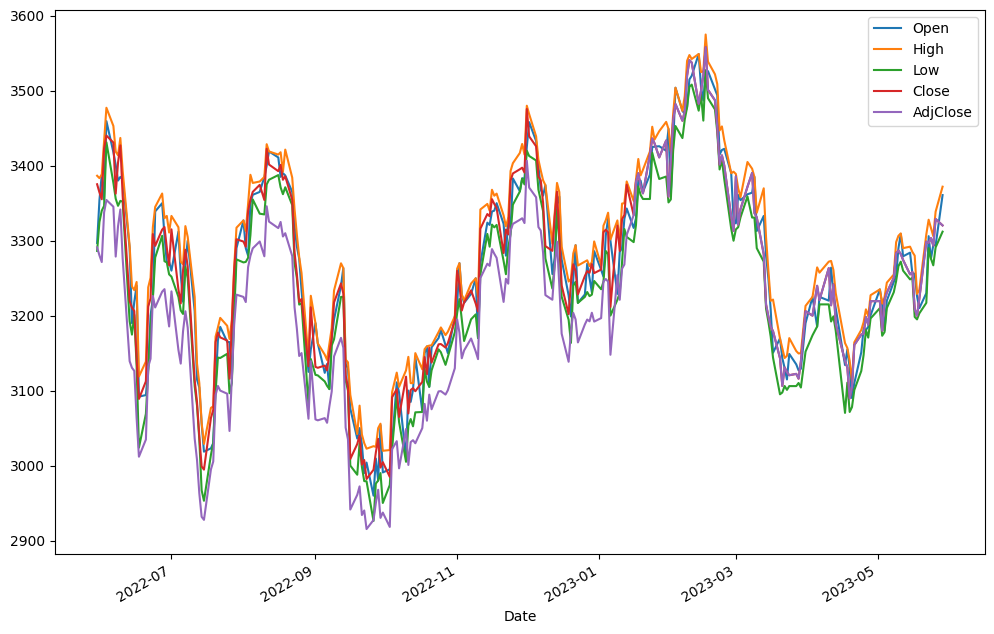

In [3]:
df.columns=["Open","High","Low","Close","AdjClose","Volume"]
# newdf = df.copy()
df = df.drop(["Volume"],axis=1)
df.plot(figsize=(12,8))

In [4]:
def make_data(df,name,n,col):
    for i in range(1,n+1):
        df[f"{name}_{i}"] = df[col].shift(+i)
    return df

make_data(df,"NewOpen",3,"Open")
make_data(df,"NewClose",3,"Close")
make_data(df,"NewHigh",3,"High")
make_data(df,"NewLow",3,"Low")
make_datadatadata.head()

,Open,High,Low,Close,AdjClose,NewOpen_1,NewOpen_2,NewOpen_3,NewClose_1,NewClose_2,NewClose_3,NewHigh_1,NewHigh_2,NewHigh_3,NewLow_1,NewLow_2,NewLow_3
Date,,,,,,,,,,,,,,,,,
2022-05-30,3297.000000,3386.600098,3286.350098,3375.250000,3291.009277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-31,3354.149902,3383.399902,3325.000000,3364.350098,3280.381592,3297.000000,NaN,NaN,3375.250000,NaN,NaN,3386.600098,NaN,NaN,3286.350098,NaN,NaN
2022-06-01,3388.000000,3388.000000,3340.050049,3355.199951,3271.459717,3354.149902,3297.000000,NaN,3364.350098,3375.250000,NaN,3383.399902,3386.600098,NaN,3325.000000,3286.350098,NaN
2022-06-02,3355.000000,3432.000000,3346.300049,3423.000000,3337.567627,3388.000000,3354.149902,3297.000000,3355.199951,3364.350098,3375.250000,3388.000000,3383.399902,3386.600098,3340.050049,3325.000000,3286.350098
2022-06-03,3459.399902,3477.300049,3431.199951,3440.149902,3354.289307,3355.000000,3388.000000,3354.149902,3423.000000,3355.199951,3364.350098,3432.000000,3388.000000,3383.399902,3346.300049,3340.050049,3325.000000


In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,AdjClose,NewOpen_1,NewOpen_2,NewOpen_3,NewClose_1,NewClose_2,NewClose_3,NewHigh_1,NewHigh_2,NewHigh_3,NewLow_1,NewLow_2,NewLow_3
Date,,,,,,,,,,,,,,,,,
2022-06-02,3355.000000,3432.000000,3346.300049,3423.000000,3337.567627,3388.000000,3354.149902,3297.000000,3355.199951,3364.350098,3375.250000,3388.000000,3383.399902,3386.600098,3340.050049,3325.000000,3286.350098
2022-06-03,3459.399902,3477.300049,3431.199951,3440.149902,3354.289307,3355.000000,3388.000000,3354.149902,3423.000000,3355.199951,3364.350098,3432.000000,3388.000000,3383.399902,3346.300049,3340.050049,3325.000000
2022-06-06,3418.000000,3453.000000,3377.149902,3430.949951,3345.319336,3459.399902,3355.000000,3388.000000,3440.149902,3423.000000,3355.199951,3477.300049,3432.000000,3388.000000,3431.199951,3346.300049,3340.050049
2022-06-07,3401.050049,3418.850098,3356.000000,3362.699951,3278.772705,3418.000000,3459.399902,3355.000000,3430.949951,3440.149902,3423.000000,3453.000000,3477.300049,3432.000000,3377.149902,3431.199951,3346.300049
2022-06-08,3380.149902,3413.949951,3346.500000,3404.149902,3319.188232,3401.050049,3418.000000,3459.399902,3362.699951,3430.949951,3440.149902,3418.850098,3453.000000,3477.300049,3356.000000,3377.149902,3431.199951


In [6]:
import numpy as np

def make_data(df, l):
    final_x = []
    for i in l:
        final_x.append(np.array(df[i]).reshape(-1,1))
        
    return np.concatenate(final_x,axis=1)

final_x = make_data(df,['Open','NewOpen_1','NewOpen_2','NewOpen_3','NewClose_1','NewClose_2','NewClose_3','NewHigh_1','NewHigh_2','NewHigh_3','NewLow_1','NewLow_2','NewLow_3'])
y = np.array(df["Close"]).reshape(-1,1)
# x1,x2,x3,x4,x5,x6,y=df['Open'],df['High'],df['Low'],df['NewOpen_1'],df['NewClose_1'],df['NewClose_2'],df['Close']
# x1,x2,x3,x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(y)
# x1,x2,x3,x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),y.reshape(-1,1)
# final_x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)

In [7]:
drop = -40
X_train,X_test,y_train,y_test=final_x[:drop],final_x[drop:],y[:drop],y[drop:]

In [8]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_features=5, random_state=1,verbose=True)

In [10]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/tmp/ipykernel_1983/1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


LinearRegression()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


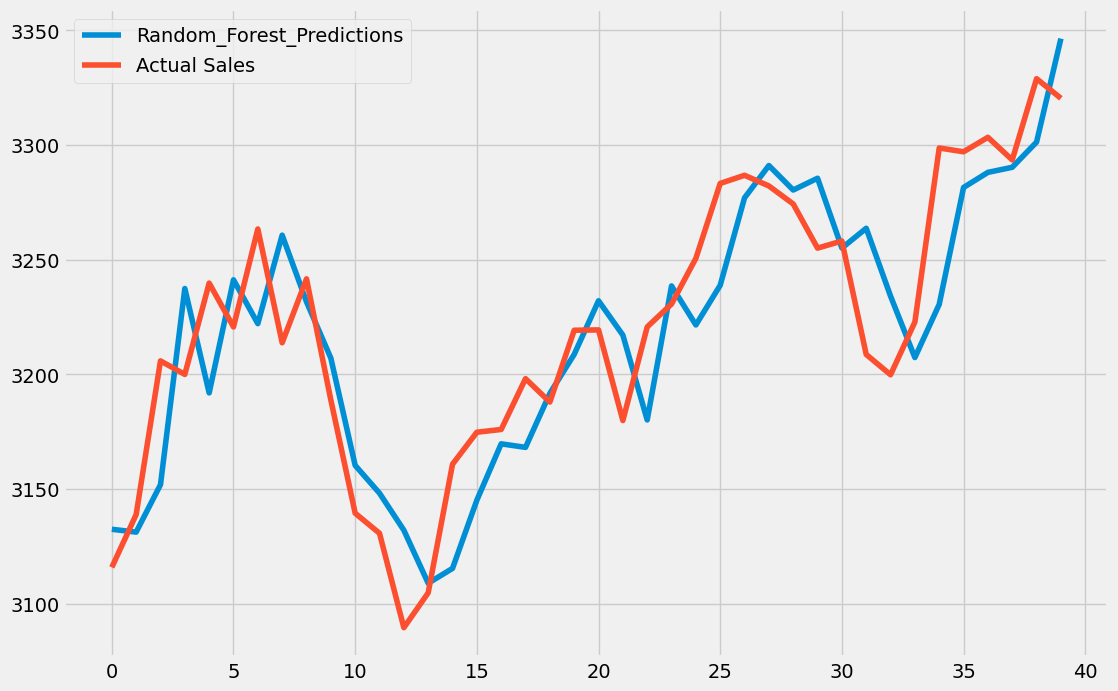

In [19]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

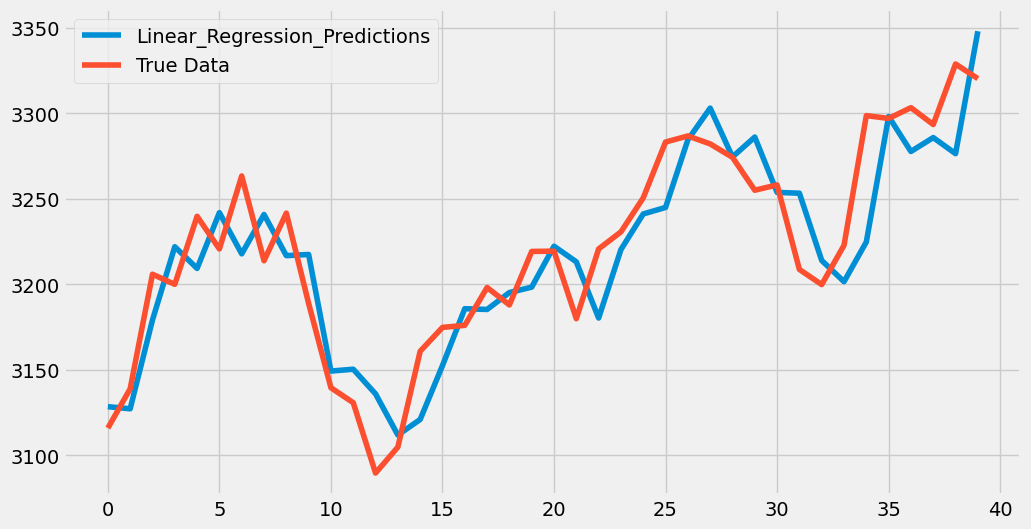

In [18]:

lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='True Data')
plt.legend(loc="upper left")
plt.show()

In [ ]:
%pip install seaborn xgboost 

In [13]:
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [14]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [15]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[08:48:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3234.54336	validation_1-rmse:3188.19692
[100]	validation_0-rmse:1195.64682	validation_1-rmse:1155.49120
[200]	validation_0-rmse:445.44121	validation_1-rmse:427.48483
[300]	validation_0-rmse:169.19664	validation_1-rmse:160.62233
[400]	validation_0-rmse:69.56352	validation_1-rmse:68.35744
[500]	validation_0-rmse:37.10623	validation_1-rmse:39.88961
[600]	validation_0-rmse:27.81253	validation_1-rmse:33.60570
[700]	validation_0-rmse:24.65555	validation_1-rmse:32.27406
[800]	validation_0-rmse:23.09994	validation_1-rmse:31.99496
[828]	validation_0-rmse:22.72277	validation_1-rmse:32.01889


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

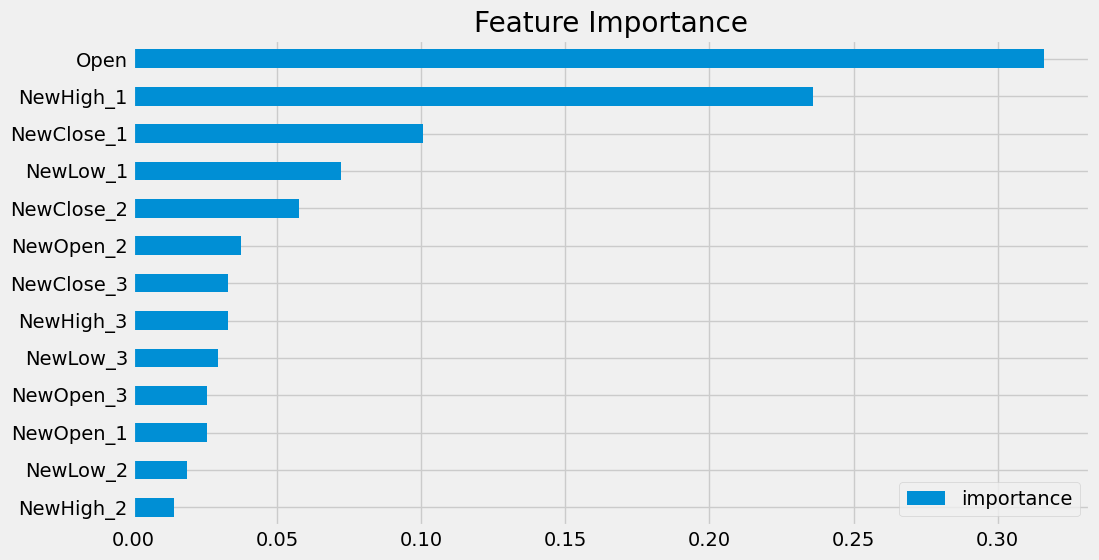

In [16]:
index = ['Open','NewOpen_1','NewOpen_2','NewOpen_3','NewClose_1','NewClose_2','NewClose_3','NewHigh_1','NewHigh_2','NewHigh_3','NewLow_1','NewLow_2','NewLow_3']
fi = pd.DataFrame(data=reg.feature_importances_,
             columns=['importance'],index=index)
fi.sort_values('importance').plot.barh(title='Feature Importance')

plt.show()

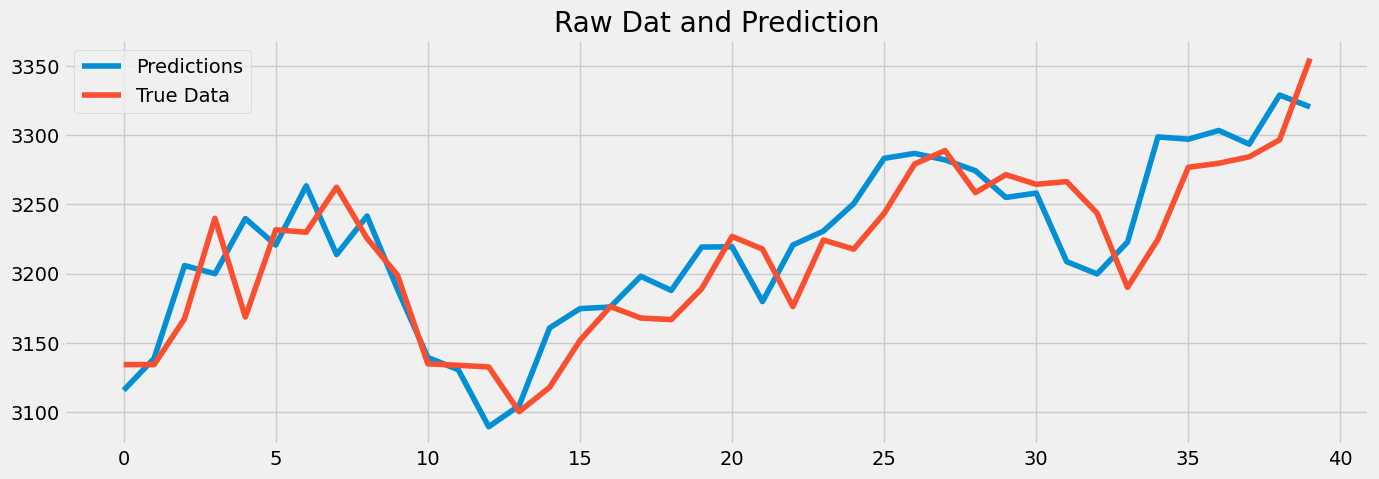

In [17]:
test = pd.DataFrame(y_test,columns=["sales"])
test['prediction'] = reg.predict(X_test)
# print(test)
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# print(df)
ax = test["sales"].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='-')
plt.legend(['Predictions','True Data'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [55]:
X_test[:-10]

array([[3235.      , 3235.      , 3210.      , 3200.399902, 3219.25    ,
        3187.949951],
       [3216.      , 3216.      , 3173.149902, 3235.      , 3219.399902,
        3219.25    ],
       [3180.149902, 3224.449951, 3178.      , 3216.      , 3179.899902,
        3219.399902],
       [3220.      , 3244.      , 3210.050049, 3180.149902, 3220.699951,
        3179.899902],
       [3245.      , 3254.850098, 3231.300049, 3220.      , 3230.699951,
        3220.699951],
       [3252.600098, 3298.      , 3246.      , 3245.      , 3250.600098,
        3230.699951],
       [3290.      , 3306.5     , 3266.050049, 3252.600098, 3283.25    ,
        3250.600098],
       [3309.      , 3309.699951, 3272.      , 3290.      , 3286.800049,
        3283.25    ],
       [3279.149902, 3290.      , 3260.      , 3309.      , 3282.149902,
        3286.800049],
       [3284.      , 3292.      , 3248.350098, 3279.149902, 3274.300049,
        3282.149902]])

In [56]:
test

,sales,prediction
0,3219.399902,3213.971191
1,3179.899902,3197.819580
2,3220.699951,3199.287842
3,3230.699951,3222.341064
4,3250.600098,3253.151855
5,3283.250000,3265.462646
6,3286.800049,3265.462646
7,3282.149902,3268.786621
8,3274.300049,3264.464844
9,3255.050049,3264.302979
